## Summary: Try and predict the revenue generated from a new product based on multiple peramiters (units_sold, rating, retail_price,...)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.csv
/kaggle/input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv
/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.sorted-by-count.csv


In [3]:
data = pd.read_csv('/kaggle/input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv')

In [4]:
data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [5]:
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [6]:
num_data = data.select_dtypes(include=['float64','int64'])

In [7]:
num_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,...,0,50,4,0,34,50,1.0,568,4.128521,0
1,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,...,0,50,2,0,41,50,1.0,17752,3.899673,0
2,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,...,0,1,3,0,36,50,1.0,295,3.989831,0
3,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,...,0,50,2,0,41,50,NaN,23832,4.020435,0
4,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,...,0,1,1,0,35,50,1.0,14482,4.001588,0


In [8]:
rev = num_data['price'] * num_data['units_sold']

In [9]:
num_data['rev'] = rev

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
num_data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,rev
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675,35211.472441
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871,72649.895203
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000,2.720000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000,800.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000,7000.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000,40000.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000,800000.000000


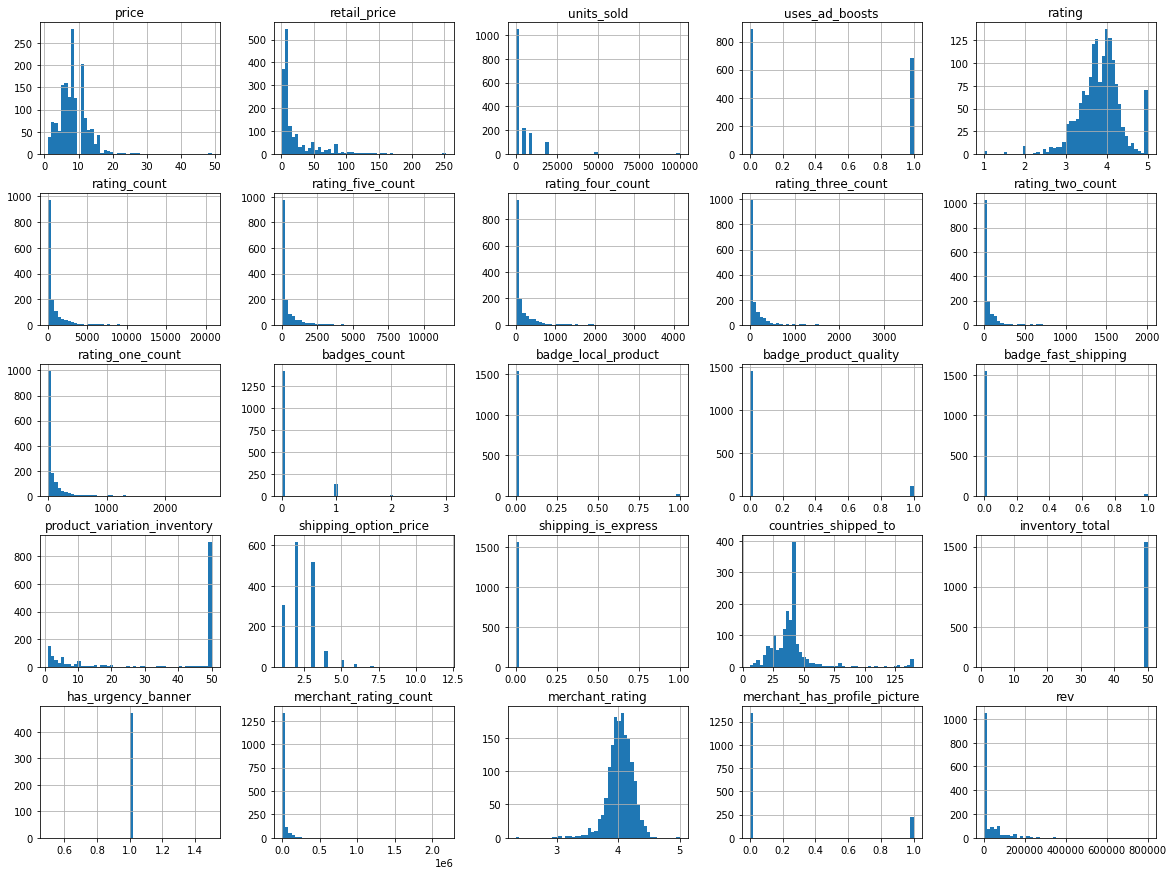

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
num_data.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b9ac9c190>,
      dtype=object)

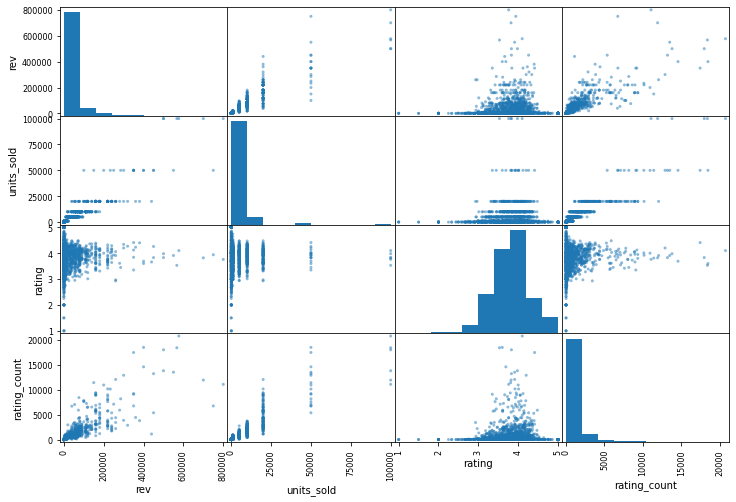

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["rev", "units_sold", "rating",
              "rating_count"]
scatter_matrix(num_data[attributes], figsize=(12, 8))

In [19]:
# will make it a classification problem because there is not a lot of data,
# the buckets are in the output
import numpy as np
X = num_data.drop(['units_sold','rev'],axis=1)
y = pd.qcut(num_data['rev'], 5, labels=False)
np.unique(pd.qcut(num_data['rev'], 5).values)

array([Interval(2.7190000000000003, 600.0, closed='right'),
       Interval(600.0, 1600.0, closed='right'),
       Interval(1600.0, 11000.0, closed='right'),
       Interval(11000.0, 56600.0, closed='right'),
       Interval(56600.0, 800000.0, closed='right')], dtype=object)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

X = num_pipeline.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [23]:
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [24]:

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train[:1150], y_train[:1150])
    y_pred = clf.predict(X_train[1150:])
    print(clf.__class__.__name__, accuracy_score(y_train[1150:], y_pred))

LogisticRegression 0.6666666666666666
RandomForestClassifier 0.8055555555555556
SVC 0.6851851851851852
VotingClassifier 0.7407407407407407


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random forest has the best results so i will use random search CV to find better peramiters

In [26]:
params = {'max_leaf_nodes': list(range(80, 200)),'n_estimators':list(range(20, 200)),
          'max_features': randint(low=10, high=23),}
rnd_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), params,
                                    verbose=1, cv=3,n_iter=10,scoring='accuracy')

rnd_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   19.6s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0b9bf255d0>,
                                        'max_leaf_nodes': [80, 81, 82, 83, 84,
                                                           85, 86, 87, 88, 89,
                                                           90, 91, 92, 93, 94,
                                                           95, 96, 97, 98, 99,
                                                           100, 101, 102, 103,
                                                           104, 105, 106, 107,
                                                           108, 109, ...],
                                        'n_estimators': [20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 30, 31,
                                                         32, 33, 34, 35, 36, 37,
    

In [27]:

cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.8354396332916619 {'max_features': 13, 'max_leaf_nodes': 88, 'n_estimators': 192}
0.8354415274463007 {'max_features': 12, 'max_leaf_nodes': 150, 'n_estimators': 159}
0.8370288290336023 {'max_features': 14, 'max_leaf_nodes': 81, 'n_estimators': 134}
0.8354358449823843 {'max_features': 11, 'max_leaf_nodes': 80, 'n_estimators': 107}
0.8386161306209039 {'max_features': 13, 'max_leaf_nodes': 152, 'n_estimators': 95}
0.8290847444785392 {'max_features': 14, 'max_leaf_nodes': 146, 'n_estimators': 66}
0.8314619085502141 {'max_features': 22, 'max_leaf_nodes': 101, 'n_estimators': 163}
0.838623707239459 {'max_features': 19, 'max_leaf_nodes': 99, 'n_estimators': 21}
0.8306644694472857 {'max_features': 21, 'max_leaf_nodes': 184, 'n_estimators': 130}
0.8330605750653484 {'max_features': 20, 'max_leaf_nodes': 81, 'n_estimators': 129}


In [28]:
model = rnd_search.best_estimator_

In [35]:
 for i,j in zip(num_data.drop(['units_sold','rev'],axis=1).columns.values,model.feature_importances_):
        print(i,j)

price 0.203811090027761
retail_price 0.030622100821373958
uses_ad_boosts 0.0026011445054086725
rating 0.02315657977153723
rating_count 0.366978470366646
rating_five_count 0.05356152423992547
rating_four_count 0.06996558234061546
rating_three_count 0.08321398797668404
rating_two_count 0.03942093393320167
rating_one_count 0.020251961104635792
badges_count 0.0008919862714172315
badge_local_product 0.0002553210199346293
badge_product_quality 0.00029535379173395177
badge_fast_shipping 0.0
product_variation_inventory 0.011932134495023155
shipping_option_price 0.008075243774162482
shipping_is_express 9.058888293377445e-05
countries_shipped_to 0.021769126836719492
inventory_total 0.000661183922290702
has_urgency_banner 0.0
merchant_rating_count 0.03060930138547527
merchant_rating 0.026365186473872912
merchant_has_profile_picture 0.005471198058647187


In [36]:
pred = model.predict(X_test)

In [37]:
accuracy_score(pred,y_test)

0.819047619047619

In [59]:
pred.shape

(315,)

In [58]:
len(model.predict(X_test))

315

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.values, pred)

ValueError: Found input variables with inconsistent numbers of samples: [315, 108]